## Seaborn介绍
Seaborn是一种基于matplotlib的图形可视化python libraty。它提供了一种**高度交互式界面**，便于用户能够做出各种有吸引力的统计图表。

Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得**作图更加容易**，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能**高度兼容numpy与pandas数据结构**以及**scipy与statsmodels等统计模式**。掌握seaborn能很大程度帮助我们更高效的观察数据与图表，并且更加深入了解它们。

其有如下特点：  
* 基于matplotlib aesthetics绘图风格，增加了一些绘图模式  
* 增加调色板功能，利用色彩丰富的图像揭示您数据中的模式  
* 运用数据子集绘制与比较单变量和双变量分布的功能  
* 运用聚类算法可视化矩阵数据  
* 灵活运用处理时间序列数据  
* 利用网格建立复杂图像集  

![seaborn_overview_img](imgs/seaborn_overview_img.png)

Seaborn中文文档：
https://seaborn.apachecn.org/#/README

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set(color_codes=True)

%matplotlib inline

```python
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
```

## seaborn安装
1.利用pip安装
```
pip install seaborn
```

2.在Anaconda环境下，打开prompt
```
conda install seaborn
```

## 基础绘图
https://blog.csdn.net/neverever01/article/details/81588412

数据集：seaborn很贴心的准备了一些数据集，自带的，我们只需要使用sns.load_dataset()方法就可以获取了

seaborn一共有5个大类21种图，分别是：
```
Relational plots 关系类图表
1. relplot() 关系类图表的接口，其实是下面两种图的集成，通过指定kind参数可以画出下面的两种图
2. scatterplot() 散点图
3. lineplot() 折线图

Categorical plots 分类图表
1. catplot() 分类图表的接口，其实是下面八种图表的集成，，通过指定kind参数可以画出下面的八种图
2. stripplot() 分类散点图
3. swarmplot() 能够显示分布密度的分类散点图
4. boxplot() 箱图
5. violinplot() 小提琴图
6. boxenplot() 增强箱图
7. pointplot() 点图
8. barplot() 条形图
9. countplot() 计数图

Distribution plot 分布图
1. jointplot() 双变量关系图
2. pairplot() 变量关系组图
3. distplot() 直方图，质量估计图
4. kdeplot() 核函数密度估计图

5. rugplot() 将数组中的数据点绘制为轴上的数据
Regression plots 回归图
1. lmplot() 回归模型图
2. regplot() 线性回归图
3. residplot() 线性回归残差图

Matrix plots 矩阵图
1. heatmap() 热力图
2. clustermap() 聚集图
```

##  distplot与kdeplot
### distplot函数
seaborn的**displot()**集合了**matplotlib的hist()**与核函数估计**kdeplot**的功能，增加了**rugplot**分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。具体用法如下：
```python
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```

**Parameters:**

* **a** : Series, 1d-array, or list.

Observed data. If this is a Series object with a name attribute, the name will be used to label the data axis.

* **bins** : argument for matplotlib hist(), or None, optional #设置矩形图数量

Specification of hist bins, or None to use Freedman-Diaconis rule.

* **hist** : bool, optional #控制是否显示条形图

Whether to plot a (normed) histogram.

* **kde** : bool, optional #控制是否显示核密度估计图

Whether to plot a gaussian kernel density estimate.

* **rug** : bool, optional #控制是否显示观测的小细条（边际毛毯）

Whether to draw a rugplot on the support axis.

* **fit** : random variable object, optional #控制拟合的参数分布图形

An object with fit method, returning a tuple that can be passed to a pdf method a positional arguments following an grid of values to evaluate the pdf on.

* **{hist, kde, rug, fit}_kws** : dictionaries, optional

Keyword arguments for underlying plotting functions.

* **vertical** : bool, optional #显示正交控制

If True, oberved values are on y-axis.

### distplot绘制单变量分布
在seaborn中想要快速查看单变量分布的最方便的方法是使用distplot()函数。默认情况下，该方法将会绘制直方图histogram并拟合[内核密度估计] kernel density estimate (KDE).

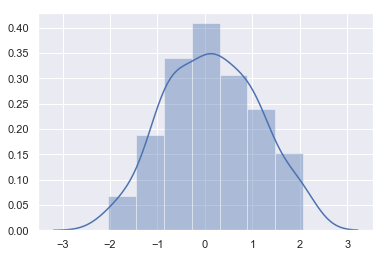

In [3]:
x = np.random.normal(size=100)
sns.distplot(x);

### Histograms直方图
直方图(Histogram)又称质量分布图。matplotlib中已经存在hist函数。 直方图首先确定数据区间，然后观察数据落入这些区间中的数量来绘制柱形图以此来表征数据的分布情况。 为了说明这一点，让我们删除密度曲线并添加一个rug plot，它在每个观察值上画一个小的垂直刻度。您可以使用rugplot() 函数来创建rugplot本身，但是也可以在 distplot()中使用:

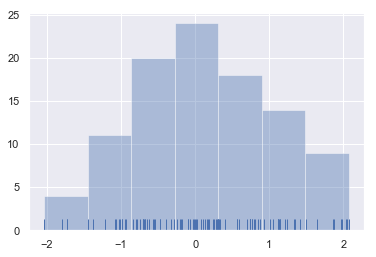

In [4]:
#kde=False关闭核密度分布,rug表示在x轴上每个观测上生成的小细条（边际毛毯）
sns.distplot(x, kde=False, rug=True)

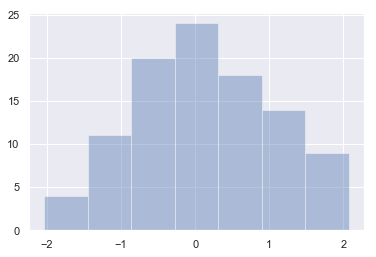

In [5]:
#不设置rug参数
sns.distplot(x, kde=False)

在绘制柱状图时，您的主要选择是要使用的“桶”的数量和放置它们的位置。 distplot() 使用一个简单的规则来很好地猜测默认情况下正确的数字是多少，但是尝试更多或更少的“桶”可能会揭示数据中的其他特性:

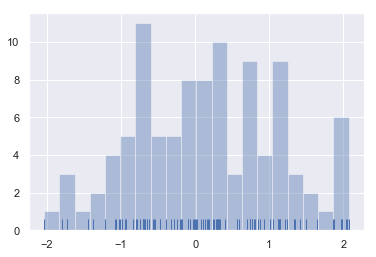

In [6]:
##设置了20个矩形条
sns.distplot(x, bins=20, kde=False, rug=True)

### Kernel density estimaton核密度估计(KDE)
核密度估计(KDE)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。．由于核密度估计方法不利用有关数据分布的先验知识，对数据分布不附加任何假定，是一种从数据样本本身出发研究数据分布特征的方法，因而，在统计学理论和应用领域均受到高度的重视。

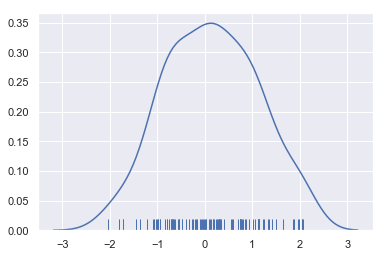

In [7]:
sns.distplot(x, hist=False, rug=True);#关闭直方图，开启rug细条

我们可以看到，如果在seaborn中使用**kdeplot()** 函数， 我们可以得到相同的曲线。这个函数也被**distplot()**所使用, 但是当您只想要密度估计时，它提供了一个更直接的接口，可以更容易地访问其他选项:

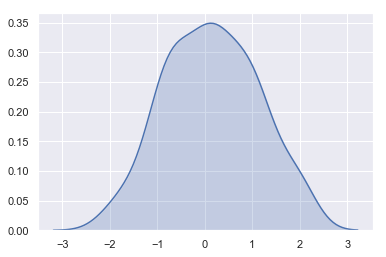

In [8]:
sns.kdeplot(x, shade=True);#shade控制阴影

KDE的带宽（bw）参数控制估计与数据的拟合程度，就像直方图中的bin大小一样。 它对应于我们在上面绘制的内核的宽度。 默认行为尝试使用常用参考规则猜测一个好的值，但尝试更大或更小的值可能会有所帮助：

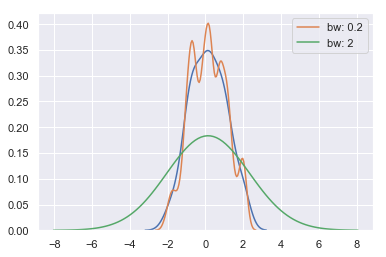

In [9]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")

### Fitting parametric distributions拟合参数分布
可以利用distplot() 把数据拟合成参数分布的图形并且观察它们之间的差距,再运用fit来进行参数控制。

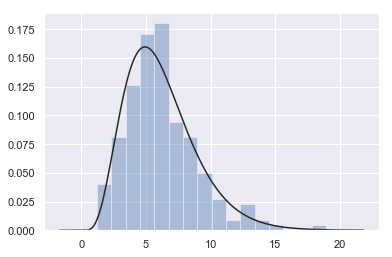

In [10]:
x = np.random.gamma(6, size=200)#生成gamma分布的数据
sns.distplot(x, kde=False, fit=stats.gamma);#fit拟合

### Example

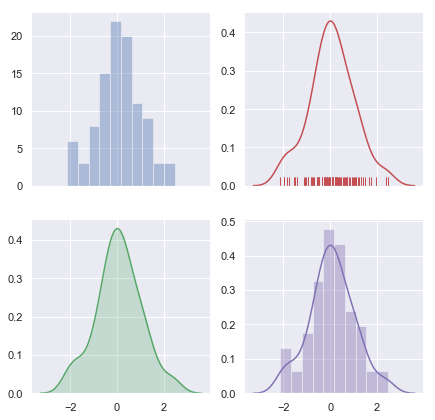

In [11]:
#sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

## barplot与countplot

### barplot
```python
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
```
条形图以矩形条的方式展示数据的点估值和置信区间

条形图用每个矩形的高度来表示数值变量的集中趋势的估计值，并提供误差条来显示估计值得不确定度。条形图的纵轴是从零开始的，这对于0值是有意义的情况是非常好的。

对于数据集中的0值没有实际意义的情况，散点图可以让您专注于一个或多个分类变量之间的差异。

**要注意的是，条形图只显示平均值（或者其他的估计值）**，但是在大部分情况下，展示数值在不同分类变量上的分布会更有用。如果要表示出数据的分布，用箱型图或者小提琴图会更恰当。

In [12]:
tips = sns.load_dataset("tips")#载入自带数据集
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Draw a set of vertical bar plots grouped by a categorical variable:

绘制一组按类别变量分组的垂直条形图：

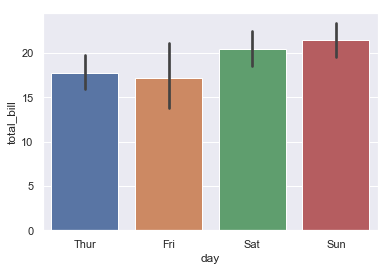

In [14]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

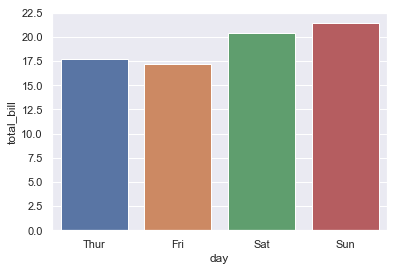

In [15]:
ax = sns.barplot(x="day", y="total_bill", data=tips ,ci=None)

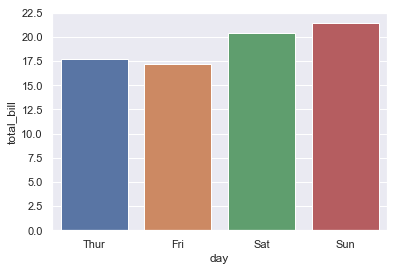

In [16]:
ax = sns.barplot(tips["day"], y=tips["total_bill"] ,ci=None)

In [17]:
#默认确实显示的是平均值
tips.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

Draw a set of vertical bars with nested grouping by a two variables:

绘制一组由两个变量嵌套分组的垂直条形图：

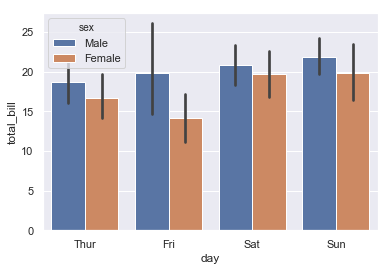

In [18]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

In [19]:
#对照图验证一下
tips.pivot_table(values="total_bill", index="day", columns="sex", aggfunc='mean')

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


Draw a set of horizontal bars:

绘制一组水平条形图：

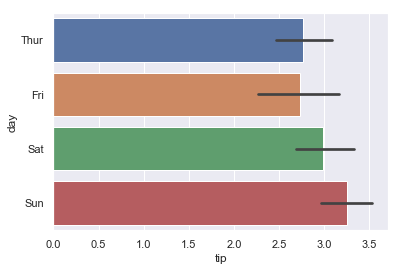

In [20]:
ax = sns.barplot(x="tip", y="day", data=tips)

In [21]:
tips.groupby("day")["tip"].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

Control bar order by passing an explicit order:

通过传入一个显式的顺序来控制条柱的顺序：

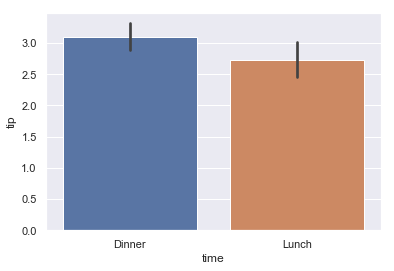

In [22]:
ax = sns.barplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

In [23]:
tips.groupby("time")["tip"].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

Use median as the estimate of central tendency:

用中位数来评估数据的集中趋势：

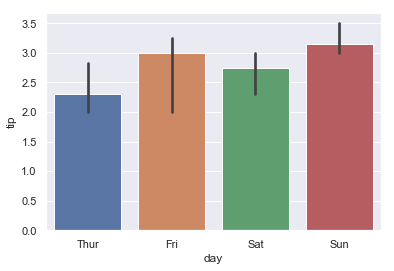

In [24]:
ax = sns.barplot(x="day", y="tip", data=tips, estimator=np.median)

隐藏误差条

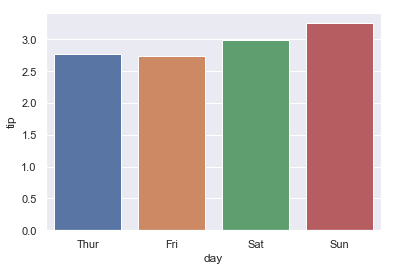

In [25]:
ax = sns.barplot(x="day", y="tip", data=tips, ci=None)

在不改变条柱的位置或者宽度的前提下，使用 hue :

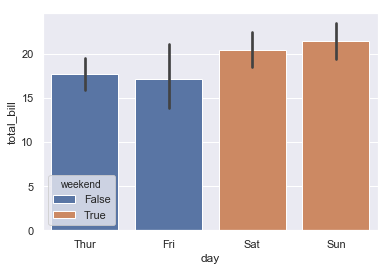

In [26]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

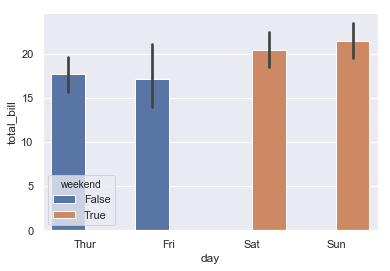

In [27]:
#不设置dodge
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips)

### countplot计数图
countplot故名思意，计数图，可将它认为一种应用到分类变量的直方图，也可认为它是用以比较类别间计数差，调用count函数的barplot。基本的API和选项与barplot()完全相同，因此可以对比学习。

In [28]:
titanic = sns.load_dataset("titanic") #titanic经典数据集，带有登船人员的信息
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


显示单个类别变量的计数值：

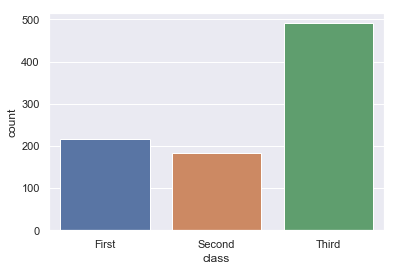

In [29]:
ax = sns.countplot(x="class", data=titanic)

显示两个类别变量的计数值：

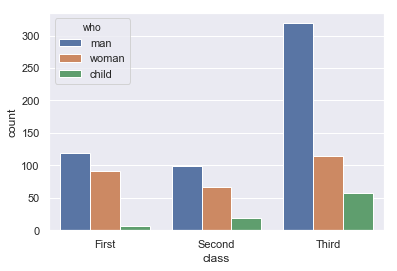

In [30]:
#源数据集class代表三等舱位，who代表人员分类，男女小孩，对每一类人数计数
ax = sns.countplot(x="class", hue="who", data=titanic) 

水平绘制条形图：

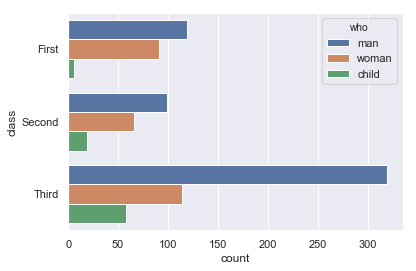

In [31]:
ax = sns.countplot(y="class", hue="who", data=titanic)

## lineplot
```python
seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
```
By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.

默认情况下，图在x的每个值上聚集多个y值，并显示中心趋势的估计值和该估计的置信区间。

In [32]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Draw a single line plot with error bands showing a confidence interval:

用显示置信区间的误差带绘制单线图：

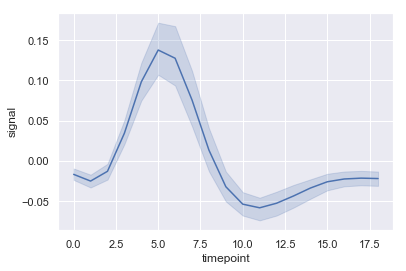

In [33]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

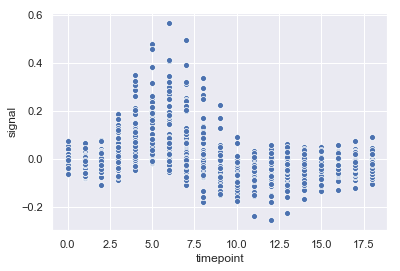

In [34]:
ax = sns.scatterplot(x="timepoint", y="signal", data=fmri)

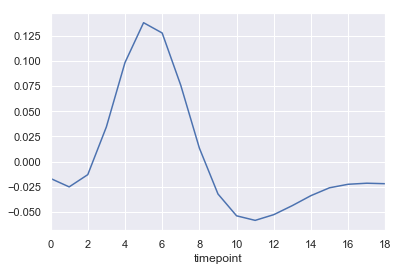

In [35]:
#用pandas画出平均值
fmri.groupby("timepoint")["signal"].mean().plot()

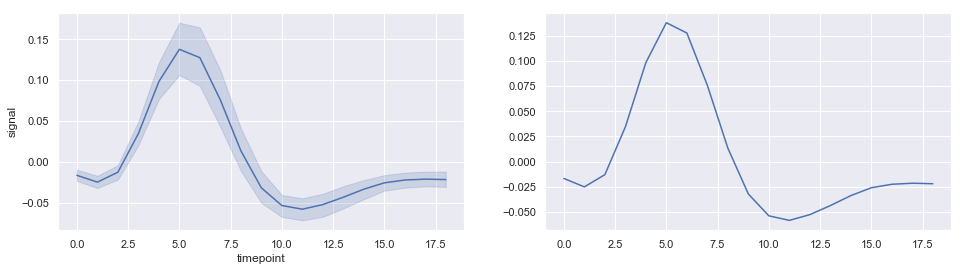

In [36]:
fig, ax = plt.subplots(1,2 ,figsize=(16,4))
sns.lineplot(x="timepoint", y="signal", data=fmri ,ax=ax[0])
sns.lineplot(data=fmri.groupby("timepoint")["signal"].mean() ,ax=ax[1])

Group by another variable and show the groups with different colors:

按另一个变量分组并显示具有不同颜色的组：

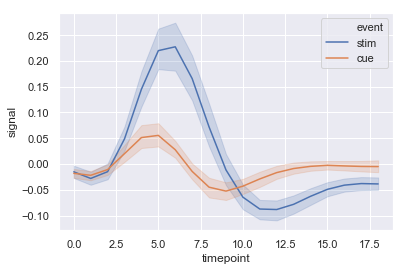

In [37]:
ax = sns.lineplot(x="timepoint", y="signal", hue="event",data=fmri)

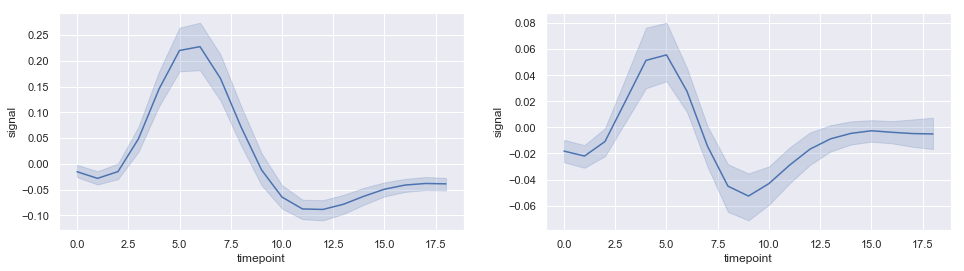

In [38]:
fig, ax = plt.subplots(1,2 ,figsize=(16,4))
sns.lineplot(x="timepoint", y="signal", data=fmri[fmri["event"]=="stim"] ,ax=ax[0])
sns.lineplot(x="timepoint", y="signal", data=fmri[fmri["event"]=="cue"] ,ax=ax[1])

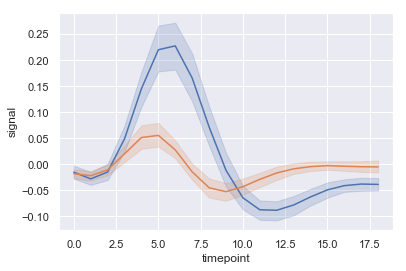

In [39]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri[fmri["event"]=="stim"] )
sns.lineplot(x="timepoint", y="signal", data=fmri[fmri["event"]=="cue"] ,ax=ax)

## scatterplot
```python
seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
```

In [40]:
tips = sns.load_dataset("tips")

Draw a simple scatter plot between two variables:

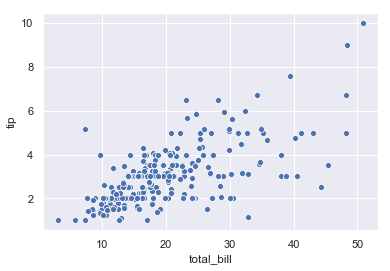

In [41]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

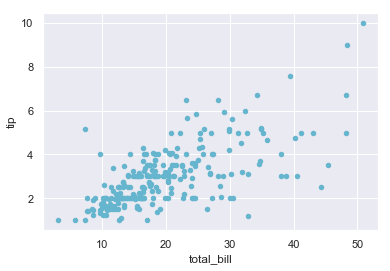

In [42]:
#使用pandas作图
tips.plot.scatter(x='total_bill', y='tip' ,c='c')

Group by another variable and show the groups with different colors:

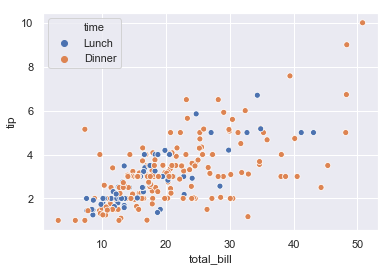

In [43]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time",data=tips)

Show a quantitative variable by varying the size of the points:

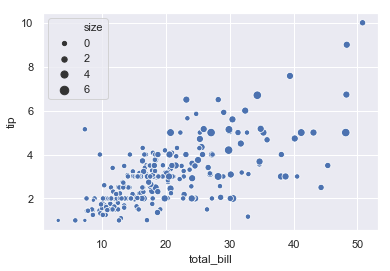

In [44]:
ax = sns.scatterplot(x="total_bill", y="tip", size="size", data=tips)

Also show the quantitative variable by also using continuous colors:

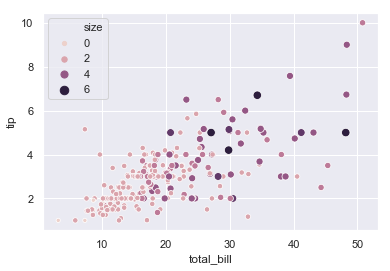

In [45]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="size", size="size", data=tips)

Use a different continuous color map:

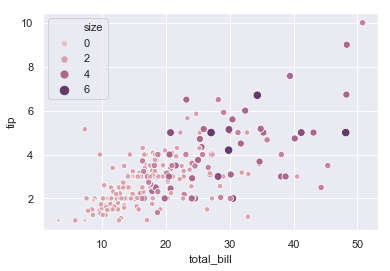

In [46]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="size",
                      palette=cmap,
                      data=tips)

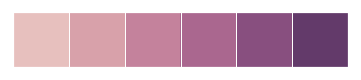

In [47]:
#调色板查看
sns.palplot( sns.cubehelix_palette(dark=.3, light=.8) )

Change the minimum and maximum point size and show all sizes in legend:

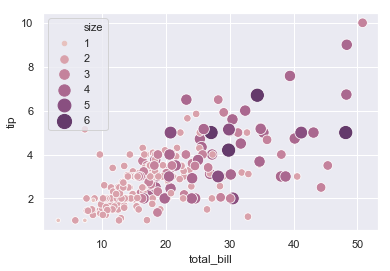

In [48]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="size",
                      sizes=(20, 200), palette=cmap,
                      legend="full", data=tips)

Vary the size with a categorical variable, and use a different palette:

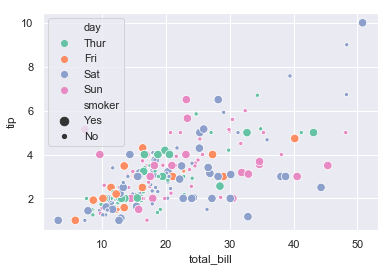

In [49]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="day", size="smoker",
                      palette="Set2",
                      data=tips)

## heatmap()热力图
```python
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```

热力图一般用来展示协方差矩阵，可以直观地看到各个变量之间的相关系数，这里我们使用diamonds数据集，来看看他们的协方差矩阵热力图

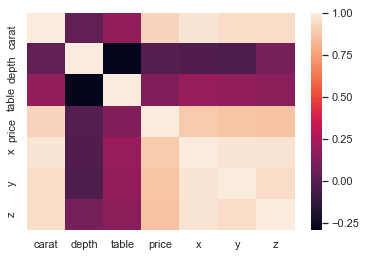

In [50]:
#使用时直接传入一个二维矩阵，如果dataset是一个dataframe格式的数据集，使用dataset.corr()方法可以得到一个协方差矩阵
sns.heatmap(data=sns.load_dataset('diamonds').corr());

为numpy数组绘制热力图：

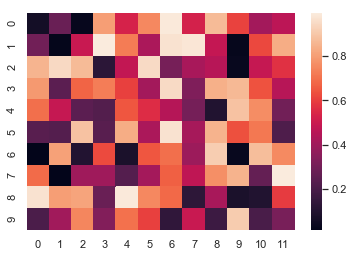

In [51]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

更改默认的colormap范围：

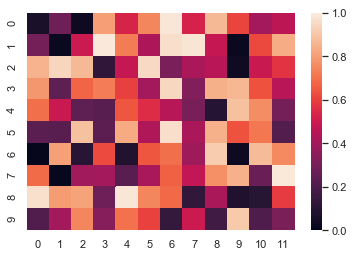

In [52]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

使用发散色图绘制以0为中心的数据的热力图：

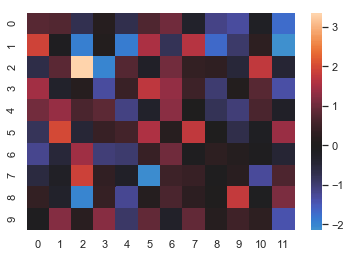

In [53]:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)

使用特定的行和列标签绘制dataframe：

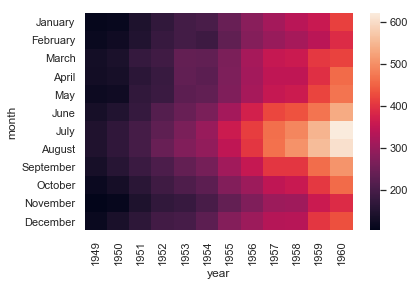

In [54]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

使用整数格式的数字值注释每个小单元格：

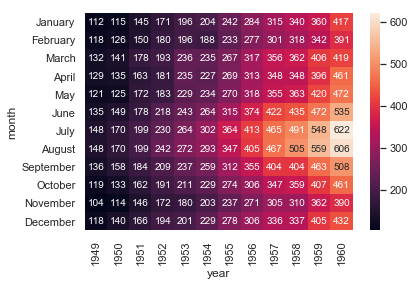

In [55]:
ax = sns.heatmap(flights, annot=True, fmt="d")

在每个单元格之间添加线：

ax = sns.heatmap(flights, linewidths=.5)

使用不同的colormap：

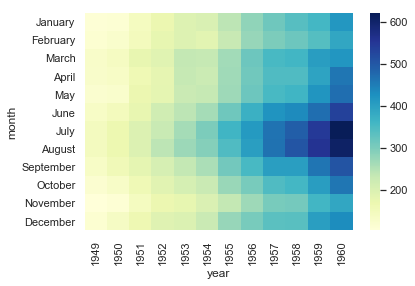

In [56]:
ax = sns.heatmap(flights, cmap="YlGnBu")

## lmplot() 回归模型
```python
seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
```
lmplot是一种集合基础绘图与基于数据建立回归模型的绘图方法。旨在创建一个方便拟合数据集回归模型的绘图方法，利用'hue'、'col'、'row'参数来控制绘图变量。

绘制两个变量之间的简单线性关系：

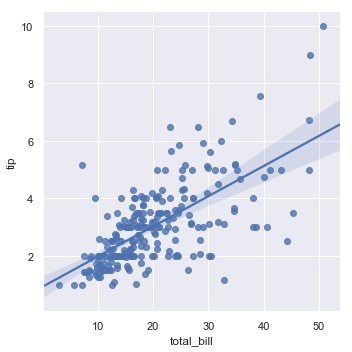

In [57]:
#账单和小费的关系
g = sns.lmplot(x="total_bill", y="tip", data=tips)

条件在第三个变量上并绘制不同颜色的水平：

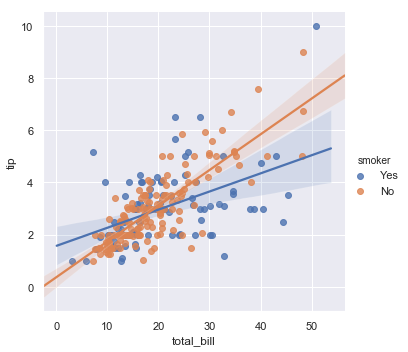

In [58]:
#研究小费tips与总消费金额total_bill在吸烟与不吸烟人之间的关系
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

通过回归模型发现total_bill=20为分界点，不吸烟者的小费高于吸烟者

使用不同的标记和颜色，以便绘图更容易再现为黑白：

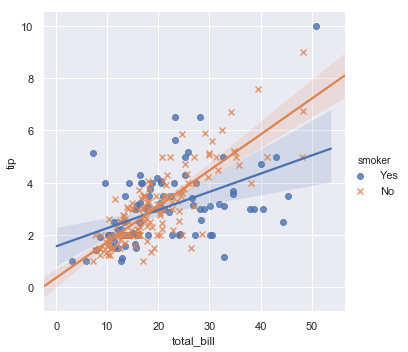

In [59]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
                markers=["o", "x"])

使用不同的调色板：

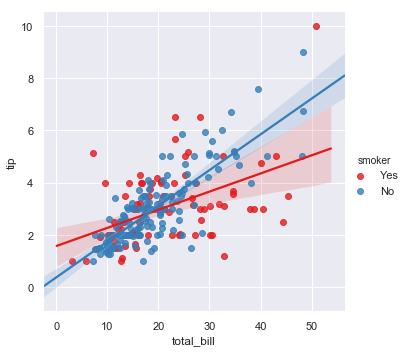

In [60]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
                palette="Set1")

使用字典将hue级别映射到颜色：

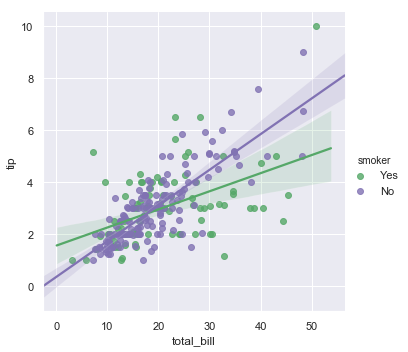

In [61]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
                palette=dict(Yes="g", No="m"))

绘制不同列中第三个变量的级别：

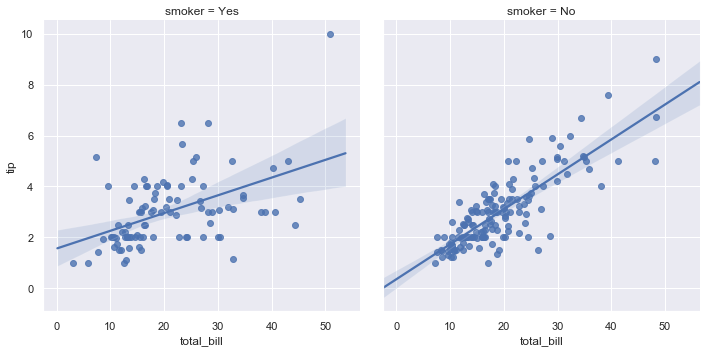

In [62]:
g = sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

更改构面的高度和纵横比：

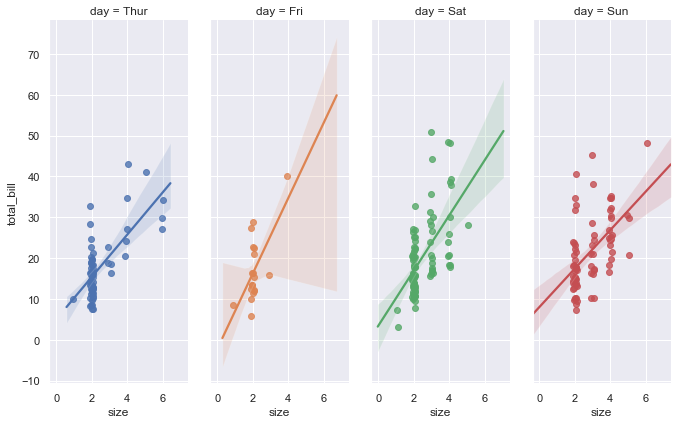

In [63]:
#aspect：标量，可选,每个分面（facet）的纵横比，因此aspect * height给出每个分面（facet）的宽度，单位为英寸。
g = sns.lmplot(x="size", y="total_bill", hue="day", col="day",
                data=tips, height=6, aspect=.4, x_jitter=.1)

将列变量的级别换行为多行：

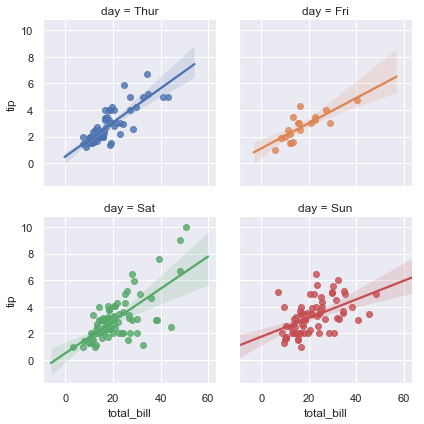

In [64]:
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
                data=tips, col_wrap=2, height=3)

两个变量上的条件形成一个完整的网格：

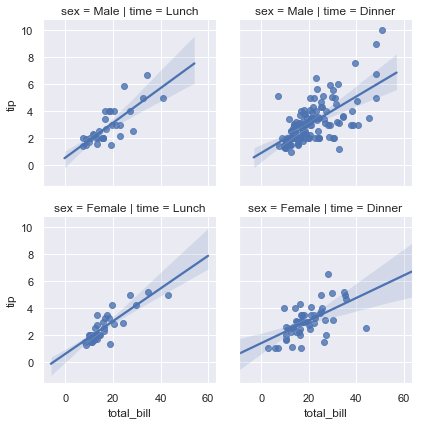

In [65]:
g = sns.lmplot(x="total_bill", y="tip", row="sex", col="time",
                data=tips, height=3)

## 调色板
https://www.jianshu.com/p/26c72ba991af

https://segmentfault.com/a/1190000014966210?utm_source=tag-newest

### 1. 分类色板（quanlitative）
Qualitative调色板，也可以说成是 类型 调色板，因为它对于分类数据的显示很有帮助。当你想要区别 不连续的且内在没有顺序关系的 数据时，这个方式是最好的。

当导入seaborn时，默认的色环就被改变成一组包含6种颜色的调色板，它使用了标准的matplolib色环，为了让绘图变得更好看一些。

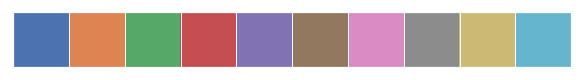

In [66]:
sns.set()
current_palette = sns.color_palette()
sns.palplot(current_palette)

有6种不同的默认主题，它们分别是：deep，muted，pastel，birght，dark，colorblind。

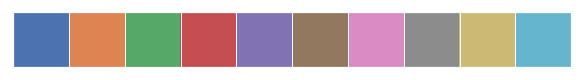

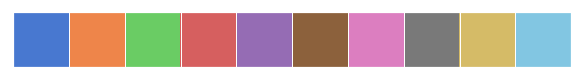

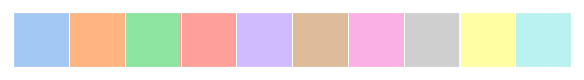

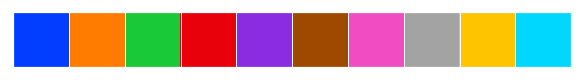

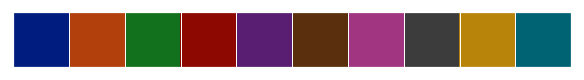

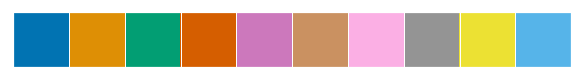

In [67]:
themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
for theme in themes:
    current_palette = sns.color_palette(theme)
    sns.palplot(current_palette)

使用色圈系统
默认的6种颜色看上去真不错，但是如果我们想要超过6种颜色呢？

当你有超过6种类型的数据要区分时，最简单的方法就是 在一个色圈空间内使用均匀分布的颜色。这也是当需要使用更多颜色时大多数seaborn函数的默认方式。

最常用的方法就是使用 hls 色空间，它是一种简单的RGB值的转换。

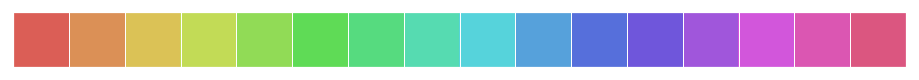

In [68]:
sns.palplot(sns.color_palette("hls", 16))

除此之外，还有一个 hls_palette 函数，它可以让你控制 hls 颜色的亮度和饱和度。

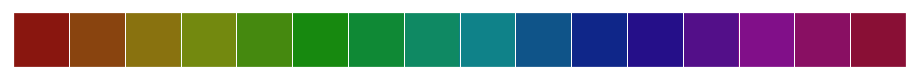

In [69]:
sns.palplot(sns.hls_palette(16, l=.3, s=.8))

然而，由于人类视觉系统工作的原因，根据RGB颜色产生的平均视觉强度的颜色，从视觉上看起来并不是相同的强度。如果你观察仔细，就会察觉到，黄色和绿色会更亮一些，而蓝色则相对暗一些。因此，如果你想用hls系统达到一致性的效果，就会出现上面的问题。

为了修补这个问题，seaborn给hls系统提供了一个接口，可以让操作者简单容易的选择均匀分布，且亮度和饱和度看上去明显一致的色调。

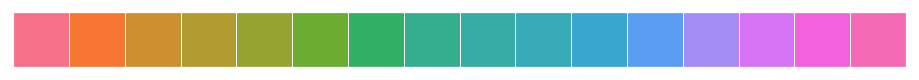

In [70]:
sns.palplot(sns.color_palette("husl", 16))

同样与之对应的，也有个husl_palette函数提供更灵活的操作。

#### 使用分类Color Brewer调色板
下面两组颜色就是使用红色和绿色组合，这可能并不是最好的选择。

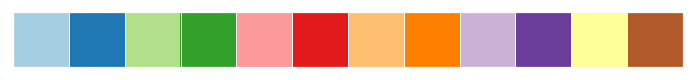

In [71]:
sns.palplot(sns.color_palette("Paired"))

为了避免这些组合，我们需要从Color Brewer库中进行选择调色，有一个专门的 choose_colorbrewer_palette 函数可以实现这个功能。这个函数需要在 IPython notebook 中使用，因为 notebook 是一个交互式的工具，可以让你浏览各种选择并且调节参数。

n：调节颜色的个数；
desat：调节明暗和饱和度；

In [72]:
sns_type = ["qualitative", "sequential", "diverging"]

for elem in sns_type:
    sns.choose_colorbrewer_palette(elem)

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

当然，您可能只想使用一组您特别喜欢的颜色。因为color_palette()接受一个颜色列表，这很容易做到。

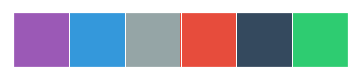

In [73]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### 2. 连续色板（sequential）
Color Brewer 的字典中就有一组很好的调色板。它们是以在调色板中的主导颜色(或颜色)命名的。

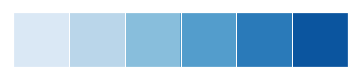

In [74]:
sns.palplot(sns.color_palette("Blues"))

就像在matplotlib中一样，如果您想要翻转渐变，您可以在面板名称中添加一个_r后缀。

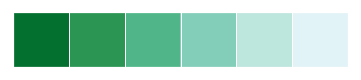

In [75]:
sns.palplot(sns.color_palette("BuGn_r"))

seaborn还增加了一个允许创建没有动态范围的"dark"面板。如果你想按顺序画线或点，这可能是有用的，因为颜色鲜艳的线可能很难区分。

类似的，这种暗处理的颜色，需要在面板名称中添加一个_d后缀。

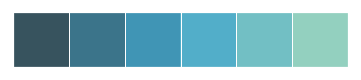

In [76]:
sns.palplot(sns.color_palette("GnBu_d"))

**定制的连续调色板**

对于一个更简单的接口定制连续色板，你可以使用light_palette() 或者 dark_palette()函数。它们都是单一颜色，并且能产生从亮值或者暗去饱和的值到这个颜色的调色板。伴随着这些函数，也同样有 choose_light_palette 和 choose_dark_palette 两个函数来交互式的调节创建调色板。

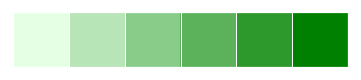

In [77]:
sns.palplot(sns.light_palette("green"))

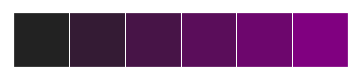

In [78]:
sns.palplot(sns.dark_palette("purple"))

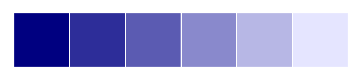

In [79]:
sns.palplot(sns.light_palette("navy", reverse=True))

### 3. 离散色板
调色板中的第三类被称为“离散”。这类色板适用于数据特征含有大的低值和大的高值。数据中通常有一个意义明确的中点。例如，如果你想要从某个基线时间点绘制温度变化，最好使用离散的颜色表显示相对降低和相对增加面积的地区。

除了你想满足一个低强度颜色的中点以及用不同起始颜色的两个相对微妙的变化，其实选择离散色板的规则类似于顺序色板。同样重要的是，起始值的亮度和饱和度是相同的。

同样重要的是要强调，应该避免使用红色和绿色，因为大量的潜在观众将无法分辨它们。

同样，Color Brewer颜色字典里也同时拥有一套精心挑选的离散颜色映射:

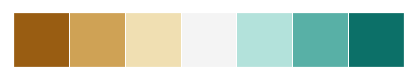

In [80]:
sns.palplot(sns.color_palette("BrBG", 7))

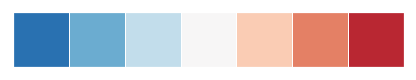

In [81]:
sns.palplot(sns.color_palette("RdBu_r", 7))

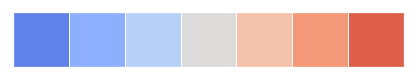

In [82]:
sns.palplot(sns.color_palette("coolwarm", 7))

**定制的离散色板**

你也可以使用seaborn函数 diverging_palette() 为离散的数据创建一个定制的颜色映射。（当然也有一个类似配套的互动工具：choose_diverging_palette()）。该函数使用husl颜色系统的离散色板。你需要传递两种色调，并可选择性的设定明度和饱和度的端点。函数将使用husl的端点值及由此产生的中间值进行均衡。

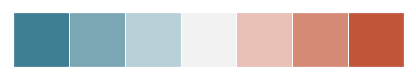

In [83]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

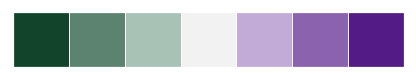

In [84]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

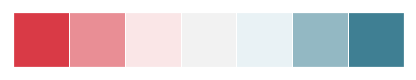

In [85]:
#sep参数控制面板中间区域的两个渐变的宽度。
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

### 设置默认的调色板
color_palette() 函数有一个名为set_palette()的配套使用函数。 set_palette()。set_palette()接受与color_palette()相同的参数，但是它会更改默认的matplotlib参数，以便成为所有的调色板配置。

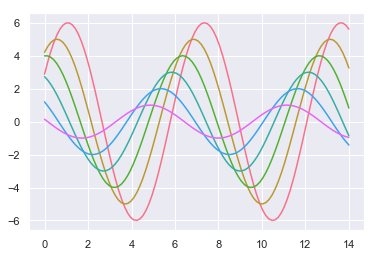

In [86]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sns.set_palette("husl")
sinplot()

color_palette()函数也可以在一个with块中使用，以达到临时更改调色板的目的。

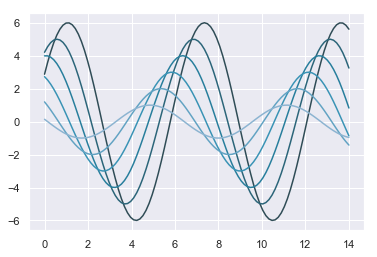

In [87]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

### 简单常用色彩总结：
* 分类：hls husl Paired Set1~Set3（色调不同）

* 连续：Blues[蓝s，颜色+s] BuGn[蓝绿] cubehelix（同色系渐变）

* 离散：BrBG[棕绿] RdBu[红蓝] coolwarm[冷暖]（双色对称）